# Importazione Librerie

In [1]:
import pandas as pd
import matplotlib as plm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns
import numpy as np
from numpy import median
from seaborn import JointGrid

# Cleaning e manipolazione dataset

Leggo il dataset

In [2]:
df = pd.read_csv('compitino_dataviz_2021_2022.csv')

Divido righe MentalScore e PhisicalScore

In [3]:
physical = df[df['nome_modulistica'] == 'SF12 PhysicalScore'].reset_index()
physical = physical.rename(columns = {'score_preop':'physical_score_preop', 'score_postop':'physical_score_postop'})
mental = df[df['nome_modulistica'] == 'SF12 MentalScore'].reset_index()
mental = mental.rename(columns = {'score_preop':'mental_score_preop', 'score_postop':'mental_score_postop'})

Unisco in un'unico dataset, generando degli attributi relativi al singolo score

In [4]:
df1 = pd.concat([physical, mental[['mental_score_preop', 'mental_score_postop']]], axis = 1)
df1.drop('index', axis = 1, inplace = True)
df1.drop('nome_modulistica', axis = 1, inplace = True)
columns_names = ['physical_score_preop',
 'physical_score_postop', 
 'mental_score_preop',
 'mental_score_postop',
 'condizioni_meteo',
 'sesso',
 'anni_ricovero',
 'temperatura_media',
 'umidita_media',
 'HI > 27',
 'natural_light']
df1 = df1.reindex(columns=columns_names)

Genero due nuove colonne contenti le differenze tra gli score post e pre operazione

In [5]:
physical_score_diff = df1['physical_score_postop'] - df1['physical_score_preop']
mental_score_diff = df1['mental_score_postop'] - df1['mental_score_preop']
df1.insert(2,"physical_score_diff", physical_score_diff)
df1.insert(5,"mental_score_diff", mental_score_diff)

Converto le colonne delle variabili categoriche da stringhe a fattori

In [6]:
df1['condizioni_meteo'] = df1['condizioni_meteo'].astype("category")
df1['sesso'] = df1['sesso'].astype("category")

Aggiunta differenze physical-mental

In [7]:
physical_mental_diff_postop = df1['physical_score_postop'] - df1['mental_score_postop']
physical_mental_diff_preop = df1['physical_score_preop'] - df1['mental_score_preop']
df1.insert(6,"physical_mental_diff_postop", physical_mental_diff_postop)
df1.insert(7,"physical_mental_diff_preop", physical_mental_diff_preop)
mental_physical_diff_postop = df1['mental_score_postop'] - df1['physical_score_postop'] 
mental_physical_diff_preop = df1['mental_score_preop'] - df1['physical_score_preop']
df1.insert(8,"mental_physical_diff_postop", mental_physical_diff_postop)
df1.insert(9,"mental_physical_diff_preop", mental_physical_diff_preop)

#### Splitting del dataset

In [8]:
mental_score_dataset = df[df['nome_modulistica'] == 'SF12 MentalScore']
physical_score_dataset = df[df['nome_modulistica'] == 'SF12 PhysicalScore']

Drop colonna nome_modulistica

In [9]:
mental_score_dataset.drop('nome_modulistica', axis = 1, inplace = True)
physical_score_dataset.drop('nome_modulistica',  axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Aggiungo la colonna delle differenze

In [10]:
physical_score_dataset.insert(2,"score_diff", (physical_score_dataset['score_postop'] - physical_score_dataset['score_preop']).round(3))
mental_score_dataset.insert(2,"score_diff", (mental_score_dataset['score_postop'] - mental_score_dataset['score_preop']).round(3))

# Visualizzazioni

Controllo le `condizioni_meteo` che predentano più di 30 osservazioni

In [11]:
df1.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   151
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       47
pioggia e schiarite                 175
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              217
sole e caldo                         49
temporale e schiarite                18
dtype: int64

Provo a ridurre il numero di categorie tenendo solo quelle con numerosià maggiore di 30

In [12]:
condizioni_meteo_numerosità_sufficiente = ['nebbia al mattino', 'nubi sparse', 'pioggia debole', 'pioggia e schiarite', \
                                          'poco nuvoloso', 'sereno', 'sole e caldo']
df1_significativo = df1[df1['condizioni_meteo'].isin(condizioni_meteo_numerosità_sufficiente)]
df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()

C:\Users\cafe6\AppData\Local\Temp/ipykernel_14636/1025064578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()


C:\Users\cafe6\AppData\Local\Temp/ipykernel_14636/3086333514.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)


Text(6, 2.5, '$\\overline{RH}=82,00 \\pm 3,55$')

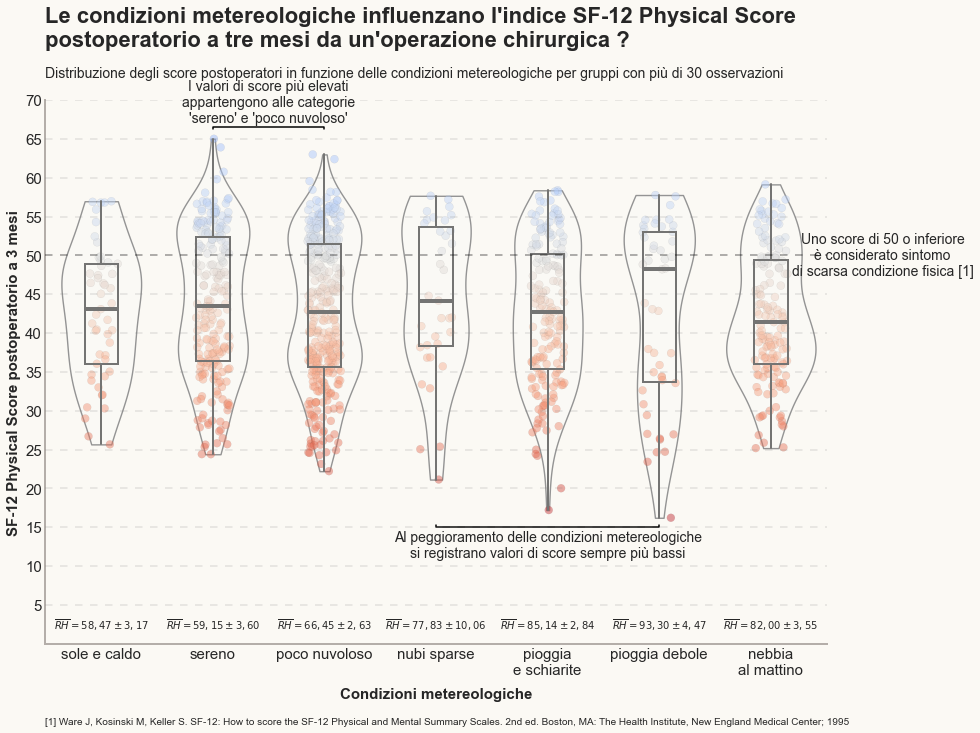

In [13]:
sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(5, 75, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)

# Color_Palette
bin = np.arange(15,85,1)
df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)

 
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)


sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      hue = 'bin',
                      # Paletta divergente reversed
                      palette = "coolwarm_r", \
                      jitter = 0.15, \
                      alpha = 0.45, \
                      linewidth = 0.1, \
                      s = 8,
                      zorder = 1,
                      ax = ax)

plt.legend([],[], frameon=False)

# Linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.4, zorder=6)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)
        

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(0,70)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
y_label_ita = "SF-12 Physical Score postoperatorio a 3 mesi"
Y_label_eng = "SF12 Physical postoperative PROM score 3 months"
ax.set_ylabel(y_label_ita, size=15, weight="bold")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold", labelpad = 10)
#x_labels (labelpad: spacing dall'asse)
xlabels = ['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia\ne schiarite', 'pioggia debole','nebbia\nal mattino']
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")



# Titolo
titolo_italiano = "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?"
titolo_inglese = "Do weather conditions affect post-operatory physical PROM scores?"
fig.suptitle(
    titolo_italiano,
    x = 0.125,
    y = 1.01,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)


# Sottotitolo
sottotitolo_italiano = "Distribuzione degli score postoperatori in funzione delle condizioni metereologiche per gruppi con più di 30 osservazioni"
ax.set_title(sottotitolo_italiano, loc='left', pad=23, fontsize=14)

# Context
tick_len = 0.25
ax.plot([1, 1, 2, 2], [66.5 - tick_len, 66.5, 66.5, 66.5 - tick_len], c="black")
ax.plot([3, 3, 5, 5], [15 + tick_len, 15, 15, 15 + tick_len], c="black")

label1 = "I valori di score più elevati\nappartengono alle categorie\n'sereno' e 'poco nuvoloso'"
label2 = "Al peggioramento delle condizioni metereologiche\nsi registrano valori di score sempre più bassi"
label3 = "Uno score di 50 o inferiore\nè considerato sintomo\ndi scarsa condizione fisica [1]"
label4 = "[1] Ware J, Kosinski M, Keller S. SF-12: How to score the SF-12 Physical and Mental Summary Scales. 2nd ed. Boston, MA: The Health Institute, New England Medical Center; 1995"

pad = 0.2
ax.text(1.5, 66.5 + pad, label1, fontsize=14, va="bottom", ha="center") 
ax.text(4, 14.8 - pad, label2, fontsize=14, va="top", ha="center") 
ax.text(7, 50, label3, fontsize=14, va="center", ha="center")
ax.text(-0.5, -10, label4, fontsize=10, va="center", ha="left")

#Umidità media e intervallo di confidenza
ax.text(0, 2.5, r'$\overline{RH}=58,47 \pm 3,17$', fontsize=10, va="center", ha="center") 
ax.text(1, 2.5, r'$\overline{RH}=59,15 \pm 3,60$', fontsize=10, va="center", ha="center") 
ax.text(2, 2.5, r'$\overline{RH}=66,45 \pm 2,63$', fontsize=10, va="center", ha="center")
ax.text(3, 2.5, r'$\overline{RH}=77,83 \pm 10,06$', fontsize=10, va="center", ha="center")
ax.text(4, 2.5, r'$\overline{RH}=85,14 \pm 2,84$', fontsize=10, va="center", ha="center") 
ax.text(5, 2.5, r'$\overline{RH}=93,30 \pm 4,47$', fontsize=10, va="center", ha="center")
ax.text(6, 2.5, r'$\overline{RH}=82,00 \pm 3,55$', fontsize=10, va="center", ha="center")

# SALVATAGGIO
#fig.tight_layout()

In [14]:
sunto_umid = df1_significativo.groupby('condizioni_meteo')['umidita_media'].agg(['count', 'std', 'mean'])

#INTERVALLO DI CONFIDENZA
z = 1.96 #corrisponde a confidenza 95%

sunto_umid['mean_conf_interv'] = 2 * z * sunto_umid['std'] / sunto_umid['count']**(1/2)
sunto_umid['mean_conf_inf'] = sunto_umid['mean'] - z * sunto_umid['std'] / sunto_umid['count']**(1/2)
sunto_umid['mean_conf_sup'] = sunto_umid['mean'] + z * sunto_umid['std'] / sunto_umid['count']**(1/2)

sunto_umid

,count,std,mean,mean_conf_interv,mean_conf_inf,mean_conf_sup
condizioni_meteo,,,,,,
nebbia al mattino,151,11.125946,82.000000,3.549233,80.225383,83.774617
nubi sparse,35,15.184136,77.828571,10.061023,72.798060,82.859083
pioggia debole,47,7.821139,93.297872,4.472055,91.061845,95.533900
pioggia e schiarite,175,9.576500,85.142857,2.837748,83.723983,86.561731
poco nuvoloso,334,12.276168,66.446108,2.633150,65.129533,67.762683
sereno,217,13.512337,59.152074,3.595727,57.354210,60.949937
sole e caldo,49,5.668267,58.469388,3.174230,56.882273,60.056503


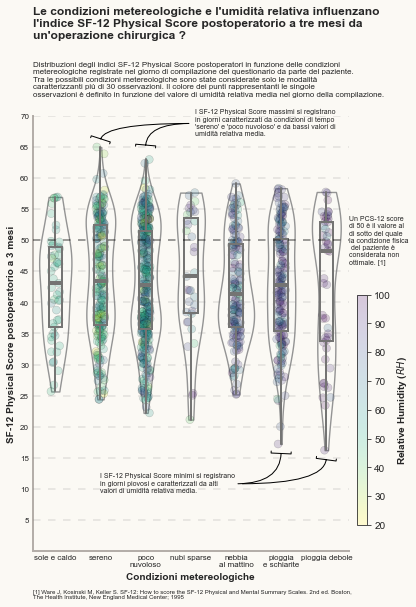

In [64]:
sns.set_style('white')
#fig, ax = plt.subplots(figsize= (14, 12))
#Tentativo
#fig, ax = plt.subplots(figsize= (5.67, 12))
#Tentativo2
my_dpi = 300
fig, ax = plt.subplots(figsize= (1700/my_dpi, 2400/my_dpi))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(5, 75, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'nebbia al mattino', 'pioggia e schiarite', 
                    'pioggia debole'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)

# Color_Palette
#bin = np.arange(15,85,1)
#df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)

 
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'nebbia al mattino', 'pioggia e schiarite', 
                    'pioggia debole'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)

# Versione Divergente
#sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
#                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'nebbia al mattino', 'pioggia e schiarite', 
#                             'pioggia debole'],
#                      hue = 'bin',
#                      # Paletta divergente reversed
#                      palette = "coolwarm_r", \
#                      jitter = 0.15, \
#                      alpha = 0.45, \
#                      linewidth = 0.1, \
#                      s = 8,
#                      zorder = 1,
#                      ax = ax)

# Versione relative humidity
#bin = np.arange(0,101,1)
#df1_significativo['bin'] = pd.cut(abs(df1_significativo['umidita_media']),bin,precision=0)
stripplot = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', hue = 'umidita_media', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'nebbia al mattino', 'pioggia e schiarite', 
                             'pioggia debole'],
                      # Paletta divergente reversed
                      palette = "viridis_r", \
                      edgecolor = "k", \
                      jitter = True, \
                      alpha = 0.2, \
                      linewidth = 0.5, \
                      s = 8,
                      zorder = 1,
                      ax = ax)

#legenda eliminata
#plt.colorbar()
plt.legend([],[], frameon=False)

# Linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.5, zorder=6)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)
        

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(0,70)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=8)
y_label_ita = "SF-12 Physical Score postoperatorio a 3 mesi"
Y_label_eng = "SF12 Physical postoperative PROM score 3 months"
ax.set_ylabel(y_label_ita, size=10, weight="bold")
ax.set_xlabel("Condizioni metereologiche", size=10, weight="bold", labelpad = 5)
#x_labels (labelpad: spacing dall'asse)
xlabels = ['sole e caldo', 'sereno', 'poco\nnuvoloso', 'nubi sparse','nebbia\nal mattino', 'pioggia\ne schiarite', 'pioggia debole']
ax.set_xticklabels(xlabels, size=8, ha="center", ma="center")


# Titolo
titolo_italiano = "Le condizioni metereologiche e l'umidità relativa influenzano\nl'indice SF-12 Physical Score postoperatorio a tre mesi da\nun'operazione chirurgica ?"
titolo_inglese = "Do weather conditions affect post-operatory physical PROM scores?"
fig.suptitle(
    titolo_italiano,
    x = 0.125,
    y = 1.07,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)


# Sottotitolo
sottotitolo_italiano = "Distribuzioni degli indici SF-12 Physical Score postoperatori in funzione delle condizioni\nmetereologiche registrate nel giorno di compilazione del questionario da parte del paziente.\nTra le possibili condizioni metereologiche sono state considerate solo le modalità\ncaratterizzanti più di 30 osservazioni. Il colore dei punti rappresentanti le singole\nosservazioni è definito in funzione del valore di umidità relativa media nel giorno della compilazione."
ax.set_title(sottotitolo_italiano, loc='left', pad=20, fontsize=8)

# Context
#tick_len = 4
#ax.plot([1, 1, 2, 2], [66.5 - tick_len, 66.5, 66.5, 66.5 - tick_len], c="black")
#ax.plot([3, 3, 5, 5], [15 + tick_len, 15, 15, 15 + tick_len], c="black")

#Umidità media e intervallo di confidenza
#ax.text(0, 2.5, r'$\overline{RH}=58,47 \pm 3,17$', fontsize=9, va="center", ha="center") 
#ax.text(1, 2.5, r'$\overline{RH}=59,15 \pm 3,60$', fontsize=9, va="center", ha="center") 
#ax.text(2, 2.5, r'$\overline{RH}=66,45 \pm 2,63$', fontsize=9, va="center", ha="center")
#ax.text(3, 2.5, r'$\overline{RH}=77,83 \pm 10,06$',fontsize=9, va="center", ha="center")
#ax.text(4, 2.5, r'$\overline{RH}=82,00 \pm 3,55$', fontsize=9, va="center", ha="center")
#ax.text(5, 2.5, r'$\overline{RH}=85,14 \pm 2,84$', fontsize=9, va="center", ha="center") 
#ax.text(6, 2.5, r'$\overline{RH}=93,30 \pm 4,47$', fontsize=9, va="center", ha="center")


# Colorbar
cbar_ax = fig.add_axes([0.92, 0.17, 0.025, 0.4])

# Create a normalizer that goes from minimum to maximum temperature
norm = plt.Normalize(20, 100)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap="viridis_r"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "vertical",
    ticks = [20,30,40,50,60,70,80,90,100],
    alpha = 0.22
)
cb.set_label("Relative Humidity (${RH}$)", size=10, weight="bold")

# Annotazioni
label1 = "I SF-12 Physical Score minimi si registrano\nin giorni piovosi e caratterizzati da alti\nvalori di umidità relativa media."

ax.text(1, 9.5 - pad, label1, fontsize=7, va="bottom", ha="left") 
ax.annotate('', xy=(5, 16), xytext=(4, 11 - pad), 
            arrowprops=dict(arrowstyle="-[", 
                            connectionstyle="angle3,angleA=0,angleB=-90",
                            color = 'k'))
ax.annotate('', xy=(6, 15), xytext=(4.1, 11 - pad), 
            arrowprops=dict(arrowstyle="-[", 
                            connectionstyle="angle3,angleA=0,angleB=-90",
                            color = 'k'))

label2 = "I SF-12 Physical Score massimi si registrano\nin giorni caratterizzati da condizioni di tempo\n'sereno' e 'poco nuvoloso' e da bassi valori di\numidità relativa media."

ax.text(3.1, 67 - pad, label2, fontsize=7, va="bottom", ha="left") 
ax.annotate('', xy=(1, 66), xytext=(3, 69 - pad), 
            arrowprops=dict(arrowstyle="-[", 
                            connectionstyle="angle3,angleA=0,angleB=-90",
                            color = 'k'))
ax.annotate('', xy=(2, 65), xytext=(3, 69 - pad), 
            arrowprops=dict(arrowstyle="-[", 
                            connectionstyle="angle3,angleA=0,angleB=-90",
                            color = 'k'))
# Asse 50 e citazione
label3 = ("Un PCS-12 score\ndi 50 è il valore al\ndi sotto del quale\nla condizione fisica\n del paziente è\nconsiderata non\nottimale. [1]")
label4 = "[1] Ware J, Kosinski M, Keller S. SF-12: How to score the SF-12 Physical and Mental Summary Scales. 2nd ed. Boston,\nThe Health Institute, New England Medical Center; 1995"

pad = 0.2
#ax.text(1.5, 66.5 + pad, label1, fontsize=14, va="bottom", ha="center", wrap = True) 
#ax.text(4, 14.8 - pad, label2, fontsize=14, va="top", ha="center") 
ax.text(6.5, 50, label3, fontsize=7, va="center", ha="left")
ax.text(-0.5, -7, label4, fontsize=6, va="center", ha="left")

#colorbar
#norm = plt.Normalize(df1_significativo['umidita_media'].min(), df1_significativo['umidita_media'].max())
#sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#cbar = plt.colorbar(stripplot)
#stripplot.get_legend().remove()
#stripplot.figure.colorbar(sm, cax = 1)


# SALVATAGGIO

#fig.tight_layout()
fig.savefig("compitino_primaviz", dpi=300, bbox_inches='tight')
#fig.savefig("compitino_primaviz", dpi=300, bbox_inches='tight')